<div style="text-align: center;">
<h1>The University of North Carolina at Chapel Hill</h1>
<h1>COMP 555 Bioalgorithms Spring 2021</h1>
<h1 style="font-size: 200%;">Problem Set 6</h1>
</div>

---
**Problem 1:** For this problem you will need the genotypes in the file <a href="http://csbio.unc.edu/mcmillan/Comp555S21/PS06Data.csv" download="PS06Data.csv">PS06Data.csv</a>. This file has genotypes with chromosome and position for eight founder mouse strains (A/J, C57BL/6J, 129S1/SvImJ, NOD/ShiLtJ, NZO/HlLtJ, CAST/EiJ, PWK/PhJ, WSB/EiJ) followed by columns of new strains, one named for each student in COMP555. Look for your COMP555 username to identify your mouse strain and infer a mosaic of founders that maximizes your strain's genotypes using the following assumptions. The likelihood of a genotyping error is 1%, and the probability of a recombination between two genotypes can be modeled by an exponential function with a 50% probability of a change of founders when the genotype loci are separated by 20 Mbases. When reporting your answer, print a line with each marker's position, your sample's genotype at that position, and the most likely founder for that genotype in your strain.    

In [1]:
fp = open('data/PS06Data.csv', 'r')
data = fp.read().split('\n')       # break file into lines
fp.close()
header = data.pop(0).split(',')    # first line is header
while len(data[-1].strip()) < 1:   # remove extra lines
    data.pop()
for i, line in enumerate(data):    # make a list from each row
    field = line.split(',')
    field[1] = int(field[1])       # convert position to integer
    data[i] = field
fp.close()

print(header)
print('Number of probes', len(data))
for i in range(100, 110):
    print('data[%d] = %s' % (i, data[i]))

['Chromosome', 'Position', 'A/J', 'C57BL/6J', '129S1/SvImJ', 'NOD/ShiLtJ', 'NZO/HlLtJ', 'CAST/EiJ', 'PWK/PhJ', 'WSB/EiJ', 'alex11', 'amandaar', 'amo0126', 'andrqwli', 'angel899', 'avmendoz', 'bbordonaro', 'bhavinc', 'brianr24', 'bwoodman', 'carpar', 'cdrubido', 'chenfc', 'chipduy', 'cjcampos', 'cwindy', 'danieleo', 'davidhw', 'dweslynch', 'egv', 'elenatk', 'elsamoht', 'ervaring', 'ghflow', 'halljc76', 'harveyl', 'jacotayl', 'jaemh', 'jaguayo', 'jdavidp', 'jseungj', 'jwhart', 'katelyn9', 'katemao', 'kmirabel', 'mcay23', 'meganm18', 'meghna99', 'mrevsine', 'n33vay', 'narmis', 'pranav14', 'rachelet', 'rupshar', 'salma', 'samjames', 'samzhu', 'savitha', 'scatal', 'smoorthy', 'syedsyed', 'tanman', 'tpruthi1', 'tracyann', 'wxiao', 'extra01', 'extra02', 'extra03', 'extra04', 'extra05', 'extra06', 'extra07', 'extra08', 'extra09', 'extra10', 'extra11', 'extra12', 'extra13', 'extra14', 'extra15', 'extra16', 'extra17']
Number of probes 260
data[100] = ['13', 66948899, 'T', 'C', 'C', 'T', 'T', 'C'

In [2]:
sample = header.index('egv')
print(sample)

29


In [3]:
i = int(input('Enter locus [0, %d] to see its emission probability: ' % len(data)))

print(data[i])
Nstates = 8
ErrorRate = 0.01

count = dict([(call, data[i][2:2+Nstates].count(call)) for call in 'ACGTHN'])
print()
print('          ', ', '.join(['%8s' % v[0:8] for v in header[2:2+Nstates]]))

for base in count.keys():
    if count[base] == 0:
        emission = [1.0/Nstates for j in range(2, 2+Nstates)] # unexpected
    else:
        emission = [(1.0 - ErrorRate)/count[base] if data[i][j] == base else ErrorRate/(Nstates - count[base])
                    for j in range(2, 2+Nstates)]
    emission = ['%6.4f' % v for v in emission]
    print('    %s: %2d %s' % (base, count[base], emission))

Enter locus [0, 260] to see its emission probability: 29
['13', 20159611, 'C', 'C', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'T', 'C', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'C', 'T', 'T', 'T', 'C', 'T', 'T', 'C', 'C', 'C', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'C', 'H', 'C', 'T', 'C', 'C', 'C', 'T', 'T', 'C', 'C', 'T', 'C', 'T', 'T', 'C', 'T', 'C', 'C', 'T', 'C', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'C', 'C', 'T', 'C', 'T', 'T']

                A/J, C57BL/6J, 129S1/Sv, NOD/ShiL, NZO/HlLt, CAST/EiJ,  PWK/PhJ,  WSB/EiJ
    A:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250']
    C:  4 ['0.2475', '0.2475', '0.0025', '0.2475', '0.2475', '0.0025', '0.0025', '0.0025']
    G:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250']
    T:  4 ['0.0025', '0.0025', '0.2475', '0.0025', '0.0025', '0.2475', '0.2475', '0.2475']
    H:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', 

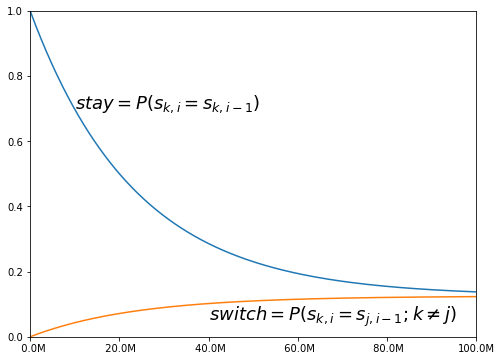

In [4]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plot

fig = plot.figure(figsize = (8, 6))
axes = fig.add_subplot(111)

Nstates = 8
scale = 23604450.02287658
x = numpy.arange(0, 100000000.0, 200000.0)
stay = ((Nstates - 1.0)*numpy.exp(-x/scale) + 1.0) / Nstates
switch = (1.0 - stay) / (Nstates - 1.0)

plot.plot(x, stay, x, switch)
plot.text(10000000, 0.7, r'$stay = P(s_{k,i} = s_{k,i-1})$', size='18')
plot.text(40000000, 0.05, r'$switch = P(s_{k,i} = s_{j,i-1}; k \neq j)$', size='18')
plot.xlim((0, 100000000.0))
plot.ylim((0, 1.0))
pos, labels = plot.xticks()
result = plot.xticks(pos, ['%5.1fM' % (p/1000000) for p in pos])

In [5]:
from math import exp, log10

Nstates = 8
prevpos = 1
scale = 23604450.02287658

state = [[(float(len(data)), i) for i in range(Nstates)]]
for i in range(len(data)):
    count = dict([(call, data[i][2:2+Nstates].count(call)) for call in 'ACGTHN'])
    observed = data[i][sample]

    if count[observed] == 0:
        emission = [1.0/Nstates for j in range(2, 2+Nstates)]
    else:
        emission = [0.99/count[data[i][j]] if data[i][j] == observed else 0.01/(Nstates - count[data[i][j]])
                    for j in range(2, 2+Nstates)]

    position = data[i][1]
    delta = position - prevpos
    prevpos = position
    stay = ((Nstates - 1.0)*exp(-delta/scale) + 1.0)/Nstates
    switch = (1.0 - stay) / (Nstates - 1.0)

    path = []
    for j in range(Nstates):
        choices = [(log10(emission[j])+(log10(stay) if k == j else log10(switch))+state[-1][k][0], k)
                   for k in range(Nstates)]
        path.append(max(choices))
    state.append(path)

print('Length of paths:', len(state))

Length of paths: 261


In [6]:
path = state[-1]
maxi = 0
maxp = path[0][0]

for i in range(1,Nstates):
    if path[i][0] > maxp:
        maxp = path[i][0]
        maxi = i
print(maxi, path[maxi], header[2+maxi])

for j in range(len(state)-2, -1, -1):
    data[j].append(header[2+maxi])
    maxi = state[j+1][maxi][1]
    
for row in data:
    print('%s, %s, %s' % (row[1], row[sample], row[-1]))

5 (81.71676433617822, 5) CAST/EiJ
3561535, C, C57BL/6J
4029227, A, C57BL/6J
4752533, T, C57BL/6J
5392085, G, C57BL/6J
5945123, G, C57BL/6J
6304055, A, C57BL/6J
7088753, T, C57BL/6J
7553047, A, C57BL/6J
7999300, G, C57BL/6J
8618531, T, C57BL/6J
9636120, C, C57BL/6J
10594297, C, C57BL/6J
11491322, G, C57BL/6J
12535416, T, C57BL/6J
13268590, G, C57BL/6J
14195930, T, C57BL/6J
14616277, G, C57BL/6J
15022703, T, C57BL/6J
15617153, A, C57BL/6J
16847837, T, C57BL/6J
16935026, G, C57BL/6J
17236701, C, C57BL/6J
17868992, G, C57BL/6J
18246094, C, C57BL/6J
18626399, A, C57BL/6J
18764095, T, C57BL/6J
19162715, G, C57BL/6J
19289945, T, C57BL/6J
19658269, G, C57BL/6J
20159611, C, C57BL/6J
20426383, G, C57BL/6J
22090835, T, C57BL/6J
23270280, T, C57BL/6J
23735565, C, C57BL/6J
25131524, C, C57BL/6J
25835082, C, C57BL/6J
26576136, G, C57BL/6J
27045522, C, C57BL/6J
28481382, A, C57BL/6J
28960442, G, C57BL/6J
29312977, T, C57BL/6J
29960408, A, C57BL/6J
30264993, T, C57BL/6J
30790623, A, C57BL/6J
31125127,

---
**Problem 2:** Create an *anti-C57BL/6J* mouse as follows. For each genotype of *C57BL/6J*, choose the alternate allele for the anti mouse. For example for the following genotypes:

    Chromosome, Position, A/J, C57BL/6J, 129S1/SvImJ, NOD/ShiLtJ, NZO/HlLtJ, CAST/EiJ, PWK/PhJ, WSB/EiJ
            13,  3561535,   A,        C,           A,          C,         C,        C,       C,       C
            13,  4029227,   A,        A,           A,          A,         G,        G,       A,       A
    
The *C* allele of *C57BL/6J* at 13:3561535 would imply an *A* in the *anti-C57BL/6J* mouse, and the *A* of 13:4029227 would imply a *G*. Once this anti mouse is constructed infer a mosaic of founders that maximizes the likelihood of the strain's genotypes using the same assumptions, and outputting in the same format as **Problem 1**.

In [7]:
b6genome = [row[3] for row in data]
print(b6genome)

['C', 'A', 'T', 'G', 'G', 'A', 'T', 'A', 'G', 'T', 'C', 'C', 'G', 'T', 'G', 'T', 'G', 'T', 'A', 'T', 'G', 'C', 'G', 'C', 'A', 'T', 'G', 'T', 'G', 'C', 'G', 'T', 'T', 'C', 'C', 'C', 'G', 'C', 'A', 'A', 'T', 'A', 'T', 'A', 'T', 'C', 'A', 'A', 'A', 'C', 'A', 'G', 'T', 'T', 'T', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'G', 'A', 'C', 'A', 'A', 'T', 'G', 'A', 'A', 'G', 'G', 'T', 'T', 'G', 'G', 'C', 'T', 'C', 'C', 'A', 'C', 'A', 'T', 'C', 'T', 'A', 'C', 'A', 'G', 'G', 'C', 'T', 'G', 'A', 'G', 'A', 'A', 'A', 'C', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'A', 'A', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'G', 'T', 'A', 'C', 'T', 'T', 'G', 'G', 'G', 'C', 'C', 'T', 'A', 'C', 'G', 'C', 'A', 'T', 'T', 'A', 'G', 'G', 'G', 'T', 'C', 'C', 'A', 'C', 'T', 'G', 'T', 'A', 'G', 'A', 'T', 'C', 'G', 'C', 'G', 'A', 'A', 'C', 'A', 'G', 'A', 'C', 'A', 'C', 'C', 'C', 'G', 'G', 'A', 'T', 'A', 'A', 'G', 'T', 'C', 'T', 'G', 'T', 'T', 'G', 'C', 'T', 'C', 'G', 'T', 'A', 'C', 'G', 'T', 'C', 'C', 'T', 'C', 'G', 'A', 'T', 'G', 'A',

In [8]:
anti_b6genome = []
for i in range(len(b6genome)):
    for j in range(2, 10):
        if data[i][j] != b6genome[i]:
            anti_b6genome.append(data[i][j])
            data[i].append(data[i][j])
            break
print(anti_b6genome)

for i in range(len(b6genome)):
    if b6genome[i] == anti_b6genome[i]:
        print(b6genome[i], anti_b6genome[i], i)

['A', 'G', 'C', 'T', 'A', 'G', 'C', 'C', 'T', 'C', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'C', 'G', 'G', 'A', 'T', 'A', 'T', 'G', 'G', 'T', 'C', 'A', 'T', 'A', 'C', 'C', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'C', 'G', 'C', 'C', 'C', 'A', 'G', 'G', 'G', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'G', 'T', 'G', 'T', 'A', 'C', 'A', 'G', 'T', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'C', 'G', 'T', 'A', 'A', 'C', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'C', 'C', 'T', 'G', 'A', 'A', 'T', 'C', 'A', 'G', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'G', 'T', 'T', 'G', 'G', 'G', 'G', 'T', 'A', 'T', 'A', 'T', 'A', 'A', 'A', 'A', 'C', 'C', 'A', 'C', 'C', 'A', 'A', 'A', 'T', 'T', 'G', 'G', 'T', 'A', 'T', 'C', 'G', 'C', 'G', 'A', 'A', 'A', 'C', 'T', 'A', 'G', 'T', 'C', 'A', 'C', 'G', 'A', 'G', 'C', 'T', 'A', 'T', 'A', 'C', 'G', 'T', 'G', 'T', 'G', 'T', 'G', 'T', 'T', 'T', 'A', 'T', 'C', 'C', 'G', 'T', 'A', 'G', 'T', 'C', 'A', 'C', 'C', 'T', 'T', 'C', 'T', 'T', 'C', 'G', 'T', 'A', 'C', 'T', 'T', 'C', 'T', 'A', 'G', 'G', 'T', 'C',

In [9]:
sample = -1
Nstates = 8
prevpos = 1
scale = 23604450.02287658

state = [[(float(len(data)),i) for i in range(Nstates)]]
for i in range(len(data)):
    count = dict([(call, data[i][2:2+Nstates].count(call)) for call in 'ACGTHN'])
    observed = data[i][sample]

    if count[observed] == 0:
        emission = [1.0/Nstates for j in range(2, 2+Nstates)]
    else:
        emission = [0.99/count[data[i][j]] if data[i][j] == observed else 0.01/(Nstates - count[data[i][j]])
                    for j in range(2, 2+Nstates)]

    position = data[i][1]
    delta = position - prevpos
    prevpos = position
    stay = ((Nstates - 1.0)*exp(-delta/scale) + 1.0)/Nstates
    switch = (1.0 - stay)/(Nstates - 1.0)

    path = []
    for j in range(Nstates):
        choices = [(log10(emission[j])+(log10(stay) if k == j else log10(switch))+state[-1][k][0], k)
                   for k in range(Nstates)]
        path.append(max(choices))
    state.append(path)
    
print(header[sample])
print('Length of paths:', len(state))

extra17
Length of paths: 261


In [10]:
path = state[-1]
maxi = 0
maxp = path[0][0]

for i in range(1, Nstates):
    if path[i][0] > maxp:
        maxp = path[i][0]
        maxi = i
print(maxi, path[maxi], header[2+maxi])

for j in range(len(state)-2, -1, -1):
    data[j].append(header[2+maxi])
    maxi = state[j+1][maxi][1]

for row in data:
    print('%s, %s, %s' % (row[1], row[-2], row[-1]))

2 (-13.933684226318125, 2) 129S1/SvImJ
3561535, A, NZO/HlLtJ
4029227, G, NZO/HlLtJ
4752533, C, NZO/HlLtJ
5392085, T, NOD/ShiLtJ
5945123, A, NOD/ShiLtJ
6304055, G, NOD/ShiLtJ
7088753, C, NOD/ShiLtJ
7553047, C, NOD/ShiLtJ
7999300, T, NOD/ShiLtJ
8618531, C, NOD/ShiLtJ
9636120, T, NOD/ShiLtJ
10594297, T, NOD/ShiLtJ
11491322, T, NOD/ShiLtJ
12535416, C, CAST/EiJ
13268590, A, CAST/EiJ
14195930, C, CAST/EiJ
14616277, A, CAST/EiJ
15022703, C, CAST/EiJ
15617153, G, CAST/EiJ
16847837, G, A/J
16935026, A, A/J
17236701, T, A/J
17868992, A, A/J
18246094, T, A/J
18626399, G, A/J
18764095, G, A/J
19162715, T, A/J
19289945, C, PWK/PhJ
19658269, A, PWK/PhJ
20159611, T, PWK/PhJ
20426383, A, PWK/PhJ
22090835, C, PWK/PhJ
23270280, C, PWK/PhJ
23735565, T, PWK/PhJ
25131524, T, CAST/EiJ
25835082, A, CAST/EiJ
26576136, A, CAST/EiJ
27045522, T, CAST/EiJ
28481382, G, CAST/EiJ
28960442, G, CAST/EiJ
29312977, C, CAST/EiJ
29960408, G, CAST/EiJ
30264993, C, CAST/EiJ
30790623, C, CAST/EiJ
31125127, C, A/J
31277921, A

---
**Problem 3:** How many reversal breakpoints does the permutation [8, 7, 10, 9, 6, 5, 4, 3, 2, 1] have? What does this imply about the lower bound on the number of reversals necessary to sort the given permutation?

In [11]:
print('Reversal breakpoints:', 4)
print('Lower bound estimate:', 2)

Reversal breakpoints: 4
Lower bound estimate: 2


---
**Problem 4:** How many reversals does the <code>**greedyReversalSort()**</code> algorithm require to sort the given permutation? How many reversals does the <code>**improvedBreakpointReversalSort()**</code> algorithm require?

In [12]:
def greedyReversalSort(pi):
    t = 0
    for i in range(len(pi)-1):
        j = pi.index(min(pi[i:]))
        if j != i:
            pi = pi[:i] + [v for v in reversed(pi[i:j+1])] + pi[j+1:]
            print('rho(%d, %d) = %s' % (i+1, j+1, pi))
            t += 1
    print()
    print('Number of reversals = ', end='')
    return t

pi = [8, 7, 10, 9, 6, 5, 4, 3, 2, 1] 
print(greedyReversalSort(pi))

rho(1, 10) = [1, 2, 3, 4, 5, 6, 9, 10, 7, 8]
rho(7, 9) = [1, 2, 3, 4, 5, 6, 7, 10, 9, 8]
rho(8, 10) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Number of reversals = 3


In [13]:
def hasBreakpoints(seq):
    for i in range(1, len(seq)):
        if seq[i] != seq[i-1] + 1:
            return True
    return False

def getStrips(seq):
    deltas = [seq[i+1] - seq[i] for i in range(len(seq)-1)]
    increasing = list()
    decreasing = list()
    start = 0
    for i, diff in enumerate(deltas):
        if abs(diff) == 1 and diff == deltas[start]:
            continue
        if start > 0:
            if deltas[start] == 1:
                increasing.append((start, i+1))
            else:
                decreasing.append((start, i+1))
        start = i + 1
    return increasing, decreasing

def pickReversal(seq, strips):
    for i, j in strips:
        k = seq.index(seq[j-1]-1)
        if seq[k+1] + 1 == seq[j]:
            # Removes 2 breakpoints
            return 2, (min(k+1, j), max(k+1, j))
    # In the worst case we remove only one, but avoid the length '1' strips
    for i, j in strips:
        k = seq.index(seq[j-1]-1)
        if j - i > 1:
            break
    return 1, (min(k+1, j), max(k+1, j))

def doReversal(seq, reversal):
    i, j = reversal
    return seq[:i] + [element for element in reversed(seq[i:j])] + seq[j:]

def improvedBreakpointReversalSort(seq, verbose=True):
    seq = [0] + seq + [max(seq)+1]
    N = 0

    while hasBreakpoints(seq):
        increasing, decreasing = getStrips(seq)
        if len(decreasing) > 0:
            removed, reversal = pickReversal(seq, decreasing)
        else:
            removed, reversal = 0, increasing[0]
        if verbose:
            print('Strips:', increasing, decreasing)
            print('%d: %s  rho%s' % (removed, seq, reversal))
        seq = doReversal(seq, reversal)
        N += 1
    if verbose:
        print(seq, 'sorted')
    print()
    print('Number of reversals = ', end='')
    return N

In [14]:
print(improvedBreakpointReversalSort(pi, verbose=True))

Strips: [] [(1, 3), (3, 5), (5, 11)]
1: [0, 8, 7, 10, 9, 6, 5, 4, 3, 2, 1, 11]  rho(3, 6)
Strips: [(4, 6)] [(1, 4), (6, 11)]
1: [0, 8, 7, 6, 9, 10, 5, 4, 3, 2, 1, 11]  rho(4, 7)
Strips: [] [(1, 5), (5, 7), (7, 11)]
1: [0, 8, 7, 6, 5, 10, 9, 4, 3, 2, 1, 11]  rho(5, 8)
Strips: [(6, 8)] [(1, 6), (8, 11)]
1: [0, 8, 7, 6, 5, 4, 9, 10, 3, 2, 1, 11]  rho(6, 9)
Strips: [] [(1, 7), (7, 9), (9, 11)]
1: [0, 8, 7, 6, 5, 4, 3, 10, 9, 2, 1, 11]  rho(7, 10)
Strips: [(8, 10)] [(1, 8), (10, 11)]
1: [0, 8, 7, 6, 5, 4, 3, 2, 9, 10, 1, 11]  rho(8, 11)
Strips: [] [(1, 9), (9, 11)]
1: [0, 8, 7, 6, 5, 4, 3, 2, 1, 10, 9, 11]  rho(1, 9)
Strips: [] [(9, 11)]
2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9, 11]  rho(9, 11)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] sorted

Number of reversals = 8


---
**Problem 5:** Every permutation of length 10 can be generated using <code>itertools.permutations(range(1, 11))</code> (there are 10! = 3628800). The number of breakpoints in each permutation can be determined using the results of <code>**getStrips()**</code>. From this, the lower bound of the optimal algorithm can be computed *b(&Pi;)/2*. Find the approximation ratio for the <code>**improvedBreakpointReversalSort()**</code> algorithm over all permuations of length 10 and an example permutation where this algorithm achieves the optimal number of traversals.

In [15]:
import itertools

N, arsum = 0, 0.0

for permutation in itertools.permutations(range(1, 11)):
    pi = list(permutation)

    rlist, flist = getStrips([0] + pi + [max(pi) + 1])
    breakpoints = len(rlist) + len(flist)

    if breakpoints == 0:
        arsum += 1.0
    else:
        breakpoints += 1
        optimal = (breakpoints + 1) // 2

        actual = improvedBreakpointReversalSort(pi, verbose=False)
        arsum += actual/optimal
    N += 1

    if N % 100000 == 0:
        print(N)

print(N, arsum, arsum/N)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3628800 5101552.916720684 1.4058512226412818


In [16]:
pi = [1, 2, 3, 4, 8, 7, 6, 5, 9, 10]
print(pi)
print()

rlist, flist = getStrips([0] + pi + [max(pi) + 1])
breakpoints = len(rlist) + len(flist)

optimal = 0.0
if breakpoints == 0:
    optimal += 1.0
else:
    breakpoints += 1
    print('Breakpoints =', breakpoints)

    optimal = (breakpoints + 1) // 2
    actual = improvedBreakpointReversalSort(pi, verbose=False)

    print('Optimal ratio =', actual/optimal)

[1, 2, 3, 4, 8, 7, 6, 5, 9, 10]

Breakpoints = 2
Optimal ratio = 1.0
